Strong form equation
$$
    -u'' = \sin(n \pi x), \in (0, 1),  \; n = 0, 10 \\
    u(0) = u(1) = 0,
$$
with solution
$$
    u(x) = \frac{1}{n^2 \pi^2} \sin(n \pi x)
$$
leads to weak form equation
$$
    \int_0^1 u' v' dx = \int_0^1 f v dx, \forall \, v.
$$
Discretize to 
$$
    \int_0^1 u_h' N_l' dx = \int_0^1 f N_l dx, \, l = 0, ..., 10, \\
$$
where
$$
    u_h(x) = \sum_{k=0}^{10} u_k N_k(x) \\
    \implies \sum_{k=0}^{10} u_k \int_0^1 N_k' N_l' dx = \int_0^1 f N_l dx, \, l = 0, ..., 10
$$
and the test functions $N_k$ are the Bernstein polynomials of order 10
$$
    N_k(x) = B_k(x) = x^k (1 - x)^{10-k}.
$$

The above equations lead to the linear system
$$
    Au = b, \\
    A_{lk} = \int_0^1 N_k' N_l' dx, \\
    b_l = \int_0^1 f N_l dx.
$$

From the boundary conditions $u(0) = u(1) = 0$, we immediately know that $u_0 = u_{10} = 0$, so we remove them from the computations. If we don't do this, the stiffness matrix is singular.

In [5]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

In [6]:
x = Symbol('x')

n = 10
f = sin(n * pi * x)

u_ex = f / (n**2 * pi**2)

def Nl(l_in: int):
    assert 0 < l_in < 10
    return x**l_in * (1 - x)**(10 - l_in) * binomial(10, l_in)


# data matrix
M = [[0 for _ in range(9+1)] for _ in range(9)]

# Load vector

def L(v):
    return integrate(f*v, (x, 0, 1))

for l in range(1, 9+1):
    M[l-1][9] = L(Nl(l))


# Stiffness matrix

eps = 1e-1 * 0
def a(u, v):
    return integrate(diff(u, x) * diff(v, x) + eps*u*v, (x, 0, 1))

for l in range(1, 9+1):
    v_f = Nl(l)
    for k in range(1, 9+1):
        u_f = Nl(k)
        a_val = a(u_f, v_f)# + 0.1
        
        M[l-1][k-1] = a(u_f, v_f)# + 0.1


0.0
7679.341908837081


/var/folders/zy/ry_73wqn4xn02_36wr8cjv1c0000gn/T/ipykernel_10676/4123970154.py:10: RuntimeWarning: divide by zero encountered in log
  bim = axs[1].imshow(np.log(M_np[:,[-1]]))
/var/folders/zy/ry_73wqn4xn02_36wr8cjv1c0000gn/T/ipykernel_10676/4123970154.py:10: RuntimeWarning: invalid value encountered in log
  bim = axs[1].imshow(np.log(M_np[:,[-1]]))


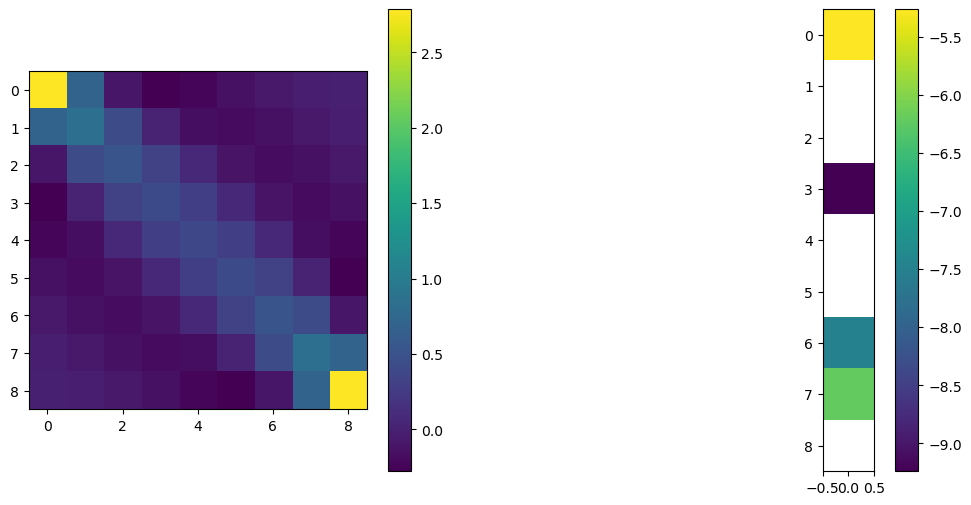

In [7]:
M_np = np.array([[float(M[i][j]) for j in range(9+1)] for i in range(9)])[:,:]

fig, axs = plt.subplots(1,2, figsize=(12,6))

#plt.figure()
aim = axs[0].imshow(M_np[:,:-1])
plt.colorbar(aim)

#plt.figure()
bim = axs[1].imshow(np.log(M_np[:,[-1]]))
plt.colorbar(bim)

print(np.linalg.norm(M_np[:,:-1].T - M_np[:,:-1]))

print(np.linalg.cond(M_np[:,:-1]))

In [8]:
M_mat = Matrix(M)

x1 = Symbol('x1')
x2 = Symbol('x2')
x3 = Symbol('x3')
x4 = Symbol('x4')
x5 = Symbol('x5')
x6 = Symbol('x6')
x7 = Symbol('x7')
x8 = Symbol('x8')
x9 = Symbol('x9')
        
a = solve_linear_system(M_mat, x1, x2, x3, x4, x5, x6, x7, x8, x9)

print(a)

u_h = a[x1] * Nl(1) + a[x2] * Nl(2) + a[x3] * Nl(3) + a[x4] * Nl(4) + \
    a[x5] * Nl(5) + a[x6] * Nl(6) + a[x7] * Nl(7) + a[x8] * Nl(8) + a[x9] * Nl(9)
print(u_h)

{x1: (-3378375*pi**4 - 1378377 + 4729725*pi**2 + 618750*pi**6)/(1562500*pi**9), x2: (-1375000*pi**6 - 13963950*pi**2 + 4135131 + 9384375*pi**4)/(781250*pi**9), x3: (-82957875*pi**4 - 38594556 + 128828700*pi**2 + 10828125*pi**6)/(3125000*pi**9), x4: (-4950000*pi**6 - 63963900*pi**2 + 19297278 + 40165125*pi**4)/(1562500*pi**9), x5: 0, x6: (-40165125*pi**4 - 19297278 + 63963900*pi**2 + 4950000*pi**6)/(1562500*pi**9), x7: (-10828125*pi**6 - 128828700*pi**2 + 38594556 + 82957875*pi**4)/(3125000*pi**9), x8: (-9384375*pi**4 - 4135131 + 13963950*pi**2 + 1375000*pi**6)/(781250*pi**9), x9: (-618750*pi**6 - 4729725*pi**2 + 1378377 + 3378375*pi**4)/(1562500*pi**9)}
x**9*(1 - x)*(-618750*pi**6 - 4729725*pi**2 + 1378377 + 3378375*pi**4)/(156250*pi**9) + 9*x**8*(1 - x)**2*(-9384375*pi**4 - 4135131 + 13963950*pi**2 + 1375000*pi**6)/(156250*pi**9) + 3*x**7*(1 - x)**3*(-10828125*pi**6 - 128828700*pi**2 + 38594556 + 82957875*pi**4)/(78125*pi**9) + 21*x**6*(1 - x)**4*(-40165125*pi**4 - 19297278 + 63963900

L^\infty-error ≈ 3.5e-10
L^error =  0.000613292216000062


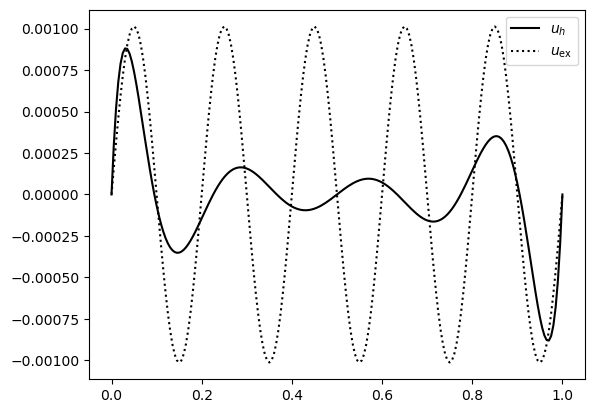

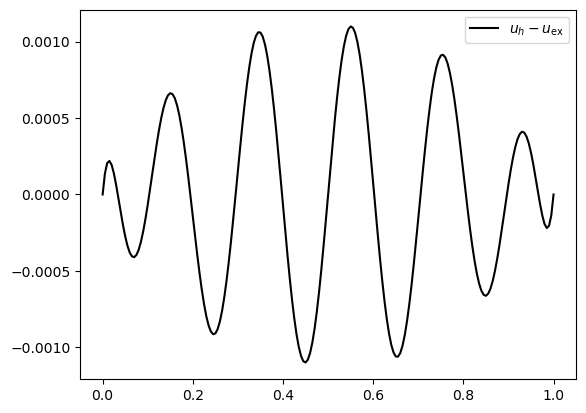

In [9]:

u_h_f = lambdify(x, u_h, "numpy")
u_ex_f = lambdify(x, u_ex, "numpy")

plt.figure()

xx = np.linspace(0, 1, 201)
plt.plot(xx, u_h_f(xx), 'k-', label=r"$u_h$")
plt.plot(xx, u_ex_f(xx), 'k:', label=r"$u_\mathrm{ex}$")
plt.legend()

plt.figure()

plt.plot(xx, u_h_f(xx) - u_ex_f(xx), 'k-', label=r"$u_h - u_\mathrm{ex}$")
plt.legend()

;

# L^\infty error is approximately 3.5 * 10^{-10} by inspecting plot 

print("L^\infty-error ≈ 3.5e-10")

# L^2 error

print("L^error = ", sqrt(integrate((u_h - u_ex)**2, (x, 0, 1))).evalf())


